<a href="https://colab.research.google.com/github/cjsdudwls1/Aflatoxin_analysis/blob/main/1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91_2_Downsize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 확인

In [ ]:
import pandas as pd

df_X = pd.read_pickle("/content/drive/MyDrive/식약처(아플라톡신 관련 데이터)/250708_통합 LIMS 시험검사 결과(항목 기준)_아플라톡신/_학습용 데이터_/df_통합_LIMS_기상정보_결합_60일_gzip_X.pkl", compression='gzip')
df_y = pd.read_pickle("/content/drive/MyDrive/식약처(아플라톡신 관련 데이터)/250708_통합 LIMS 시험검사 결과(항목 기준)_아플라톡신/_학습용 데이터_/df_통합_LIMS_기상정보_결합_60일_gzip_y.pkl", compression='gzip')

print("df_X shape:", df_X.shape)
print("df_y shape:", df_y.shape)

df_X shape: (443824, 606)
df_y shape: (443824, 3)


## 각 df의 칼럼별 유니크 수, 결측 수, 결측 비율, 대표값 5개를 데이터프레임으로 정리

In [ ]:
import pandas as pd

def summarize_dataframe_short(df, df_name):
    """
    데이터프레임의 요약 정보를 간결하게 (기본값으로 잘라서) 출력하는 함수
    """
    # 이전에 설정된 pandas 옵션을 초기화하여 기본 출력(생략 모드)으로 되돌립니다.
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')

    print(f"--- Summary for {df_name} (Short Version) ---")

    if df.empty:
        print(f"DataFrame '{df_name}' is empty.")
        return

    # 요약 정보 생성
    summary = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes.values,
        'Unique Count': df.nunique().values,
        'Missing Count': df.isnull().sum().values,
        'Missing Ratio (%)': ((df.isnull().sum() / len(df)) * 100).round(2).values
    })

    # display() 함수는 Jupyter와 같은 환경에서 표를 예쁘게 출력하며,
    # 내용이 길면 자동으로 중간을 생략합니다.
    display(summary)

# --- 코드 실행 ---
# df_X와 df_y가 이미 로드되어 있다고 가정합니다.
summarize_dataframe_short(df_X, 'df_X')
summarize_dataframe_short(df_y, 'df_y')



--- Summary for df_X (Short Version) ---


,Column,Data Type,Unique Count,Missing Count,Missing Ratio (%)
0,INSPCT_PURPS_NAME,object,11,0,0.00
1,INSPCT_KND_NAME,object,5,69520,15.66
2,PRDLST_NM,object,1422,52,0.01
3,사용주소,object,2,0,0.00
4,SPLORE_STTUS_NAME,object,5,155141,34.96
...,...,...,...,...,...
601,arvlty_300Top_00,float64,372,134320,30.26
602,afp_00,float64,393,27349,6.16
603,sunshn_Time_00,float64,800,332419,74.90
604,solrad_Qy_00,float64,3398,157742,35.54


--- Summary for df_y (Short Version) ---


,Column,Data Type,Unique Count,Missing Count,Missing Ratio (%)
0,JDGMNT_WORD_NAME,object,3,0,0.0
1,결과,object,2,0,0.0
2,결과값,object,3792,0,0.0


In [ ]:
# 컬럼 내 데이터 타입별 개수 확인
df_y['결과값'].apply(type).value_counts()

,count
결과값,
<class 'int'>,398807
<class 'str'>,45017


##부적합 판정을 받은 데이터의 수와 비율 확인

In [ ]:
print("Value Counts:")
display(df_y['JDGMNT_WORD_NAME'].value_counts())
print("\nProportions:")
display(df_y['JDGMNT_WORD_NAME'].value_counts(normalize=True) * 100)

Value Counts:


,count
JDGMNT_WORD_NAME,
적합,333866
상기실험확인함,106004
부적합,3954



Proportions:


,proportion
JDGMNT_WORD_NAME,
적합,75.224864
상기실험확인함,23.884242
부적합,0.890894


# 2. 데이터 전처리(데이터 다운사이징 까지)

## -'적합','부적합' 값만 취급. '상기실험확인함' 값 제거 <br>-INSPCT_KND_NAME 값 '축산물' 제거

In [ ]:
# 'JDGMNT_WORD_NAME' 값이 '상기실험확인함'인 데이터 제거
index_to_drop_judgment = df_y[df_y['JDGMNT_WORD_NAME'] == '상기실험확인함'].index
X_df_filtered = df_X.drop(index_to_drop_judgment)
y_df_filtered = df_y.drop(index_to_drop_judgment)

# 'INSPCT_KND_NAME' 값이 '축산물'인 데이터 제거
index_to_drop_knd = X_df_filtered[X_df_filtered['INSPCT_KND_NAME'] == '축산물'].index
X_df_filtered = X_df_filtered.drop(index_to_drop_knd)
y_df_filtered = y_df_filtered.drop(index_to_drop_knd)

print("X_df_filtered shape after filtering:", X_df_filtered.shape)
print("y_df_filtered shape after filtering:", y_df_filtered.shape)

X_df_filtered shape after filtering: (337360, 606)
y_df_filtered shape after filtering: (337360, 3)


##**나박사님의 질문**
## #식품첨가물 2종 (덱스트린, 혼합제제)에 대한 부적합 사례가 있는지?없거나 적으면 제하라 :
- 총 112건의 덱스트린, 혼합제제 관련 데이터 중 부적합 1건. 데이터 삭제.

## #식품 유형 별 나누어지는 결과가 어떤 방식으로 활용되는지? 어떤 결과값을 기대 할 수 있는지? :
- 분류된 식품 유형을 X값에 ‘식품유형’ 특성으로 추가하여, 기계학습에 추가 정보를 제공하며, 이를 통해 예측 성능 향상을 기대할 수 있음

---
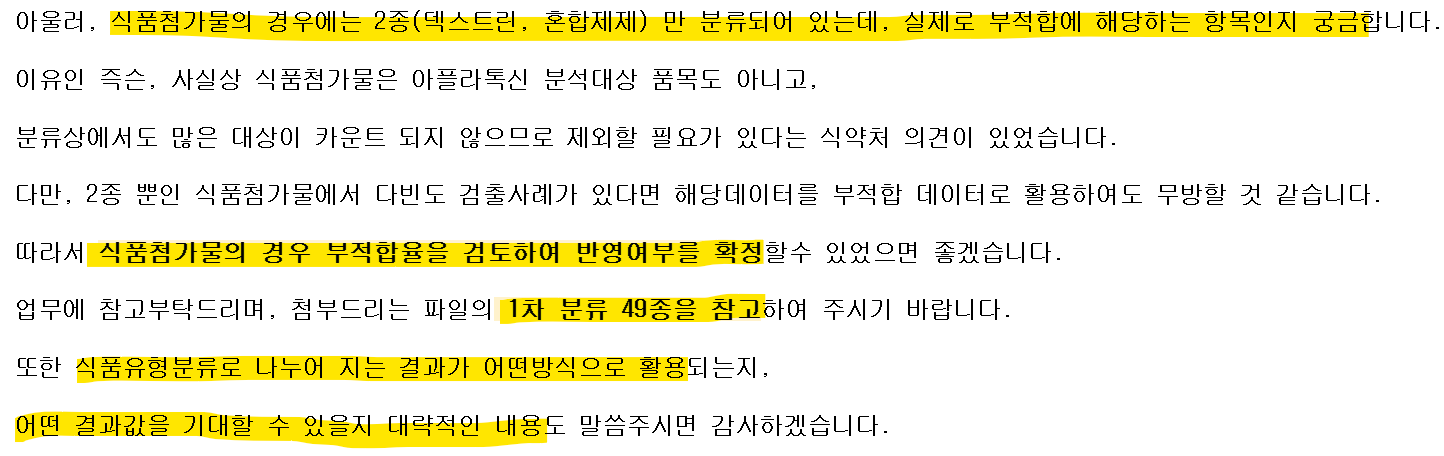

## 덱스트린, 혼합제제 관련 데이터 확인

In [ ]:
# 1. 'PRDLST_NM' 칼럼에서 값에 '덱스트린' 또는 '혼합제제'가 포함된 행을 찾습니다.
dextrin_mixture_indices = X_df_filtered[X_df_filtered['PRDLST_NM'].str.contains('덱스트린|혼합제제', na=False)].index

# 2. 해당 행의 개수를 셉니다.
dextrin_mixture_count = len(dextrin_mixture_indices)
print(f"'덱스트린' 또는 '혼합제제'가 포함된 데이터 행의 개수: {dextrin_mixture_count}")

# 3. 해당 행들의 'PRDLST_NM' 값을 출력합니다.
print("\n해당되는 PRDLST_NM 값:")
for value in X_df_filtered.loc[dextrin_mixture_indices, 'PRDLST_NM'].unique().tolist():
    print(value)

# 4. 해당 행들에서 'JDGMNT_WORD_NAME' 칼럼의 값에 대해 value_counts를 계산합니다.
print("\n해당 데이터의 'JDGMNT_WORD_NAME' 밸류 카운트:")
display(y_df_filtered.loc[dextrin_mixture_indices, 'JDGMNT_WORD_NAME'].value_counts())

'덱스트린' 또는 '혼합제제'가 포함된 데이터 행의 개수: 112

해당되는 PRDLST_NM 값:
난소화성말토덱스트린
밀전분유래난소화성말토덱스트린
밀전분유래난소화성말토덱스트린(제2011-6호)
덱스트린
혼합제제

해당 데이터의 'JDGMNT_WORD_NAME' 밸류 카운트:


,count
JDGMNT_WORD_NAME,
적합,111
부적합,1


## 덱스트린, 혼합제제 관련 데이터 삭제

In [ ]:
# 'PRDLST_NM' 칼럼에서 값에 '덱스트린' 또는 '혼합제제'가 포함된 행의 인덱스를 찾습니다.
indices_to_drop_dextrin_mixture = X_df_filtered[X_df_filtered['PRDLST_NM'].str.contains('덱스트린|혼합제제', na=False)].index

# 해당 인덱스를 X_df_filtered와 y_df_filtered에서 삭제합니다.
X_df_filtered = X_df_filtered.drop(indices_to_drop_dextrin_mixture)
y_df_filtered = y_df_filtered.drop(indices_to_drop_dextrin_mixture)

print("X_df_filtered shape after dropping rows:", X_df_filtered.shape)
print("y_df_filtered shape after dropping rows:", y_df_filtered.shape)

X_df_filtered shape after dropping rows: (337248, 606)
y_df_filtered shape after dropping rows: (337248, 3)


## LIMS와 기후데이터는 원천과 데이터형태(timeseries, cross section data)이니 각각 분리하여 데이터 전처리 수행

In [ ]:
X_lims = X_df_filtered.loc[:, :'ORGPLCE_NATION_CODE']
X_weather = X_df_filtered.loc[:, 'tmprt_150_59':]

## LIMS 데이터(Cross-sectional Data) 전처리

In [ ]:
summarize_dataframe(X_lims, 'X_lims')

--- Summary for X_lims ---


,Column,Data Type,Unique Count,Missing Count,Missing Ratio,Top 5 Values
0,INSPCT_PURPS_NAME,object,10,0,0.000000,"[수입검사, 자가품질위탁검사, 수거검사, 기타, 품질검사]"
1,INSPCT_KND_NAME,object,3,39919,11.836690,"[식품, 성분규격, 농산물]"
2,PRDLST_NM,object,1177,0,0.000000,"[과자, 땅콩 또는 견과류가공품, 과.채가공품, 곡류가공품, 땅콩 또는 견과류 가공품]"
3,사용주소,object,2,0,0.000000,"[검사소, 제조공장]"
4,SPLORE_STTUS_NAME,object,5,85163,25.252337,"[실온, 냉동, 냉장, 완제품, 소분]"
5,ORGPLCE_NATION_CODE,object,232,179436,53.205949,"[CN, US, VN, IT, TH]"


## 결측있는 칼럼 제거

In [ ]:
# 결측값이 있는 컬럼 식별
cols_with_missing = X_lims.columns[X_lims.isnull().any()].tolist()

# 결측값이 있는 컬럼 제거 및 X_lims에 저장
X_lims = X_lims.drop(columns=cols_with_missing)

print("X_lims shape after removing columns with missing values:", X_lims.shape)
display(X_lims.head())

X_lims shape after removing columns with missing values: (337248, 3)


,INSPCT_PURPS_NAME,PRDLST_NM,사용주소
0,자가품질위탁검사,과자,제조공장
1,자가품질위탁검사,과자,제조공장
2,자가품질위탁검사,과자,검사소
3,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장
4,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장


In [ ]:
X_lims['PRDLST_NM'].value_counts()

,count
PRDLST_NM,
과자,69141
땅콩 또는 견과류가공품,57900
과.채가공품,28483
곡류가공품,13563
땅콩 또는 견과류 가공품,12092
...,...
"오렌지(껍질,건조)",1
"히비스커스(꽃잎,신선)",1
멀꿀(열매),1


In [ ]:
# Filter PRDLST_NM values with length >= 10
X_lims[X_lims['PRDLST_NM'].str.len() >= 5]['PRDLST_NM'].value_counts()

,count
PRDLST_NM,
땅콩 또는 견과류가공품,57900
과.채가공품,28483
곡류가공품,13563
땅콩 또는 견과류 가공품,12092
두류가공품,7987
...,...
"피망(열매,건조)",1
"히비스커스(꽃잎,신선)",1
멀꿀(열매),1


## 식품의 종류가 동명이 많고 복합물이 유형으로 세부적으로 구분되어 추가적인 정리가 필요함. (식정원과 논의 필요)
- 땅콩 또는 견과류가공품, 땅콩 또는 견과류 가공품 --> 동일 식품유형임.
- 레몬버베나추출물 등 복합물(티에뜨레ⓡ)(제2022-13호) --> 이 건 ?
- 엑셀로 만들어 식정원에 전달 필요(mapping 해달라고)


## **식정원이 공유한 식품 분류표대로 'PRDLST_NM' 값 유형 분류**

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd

food_type_df = pd.read_excel("/content/drive/MyDrive/식약처(아플라톡신 관련 데이터)/아플라톡신 작업파일/천영진 작업/식품유형분류_250915_최종.xlsx")
display(food_type_df)

,PRDLST_NM,1차 식품 분류 (세부),Unnamed: 2,2차 식품 분류
0,과자,1,"과자류, 빵류 또는 떡류",가공식품
1,과자류,1,"과자류, 빵류 또는 떡류",가공식품
2,떡류,1,"과자류, 빵류 또는 떡류",가공식품
3,빵류,1,"과자류, 빵류 또는 떡류",가공식품
4,추잉껌,1,"과자류, 빵류 또는 떡류",가공식품
...,...,...,...,...
509,황기,32,향신식물,식물성 원료
510,회향,32,향신식물,식물성 원료
511,회향(씨),32,향신식물,식물성 원료
512,회향(잎),32,향신식물,식물성 원료


In [ ]:
summarize_dataframe(food_type_df,'food_type_df')

--- Summary for food_type_df ---


,Column,Unique Count,Missing Count,Missing Ratio,Top 5 Values
0,PRDLST_NM,513,1,0.194553,"[회화나무, 표고버섯, 포도, 팽이버섯, 팥]"
1,1차 식품 분류 (세부),39,0,0.000000,"[48, 16, 30, 32, 29]"
2,Unnamed: 2,40,0,0.000000,"[건강기능식품(제품), 농산가공식품류, 채소류, 향신식물, 과일류]"
3,2차 식품 분류,5,1,0.194553,"[가공식품, 식물성 원료, 건강기능식품, 동물성 원료, 식품첨가물]"


In [ ]:
# 1차 식품 분류 (세부) 칼럼의 값을 Unnamed: 2 칼럼의 값으로 대체
food_type_df['1차 식품 분류 (세부)'] = food_type_df['Unnamed: 2']

# 'PRDLST_NM', '1차 식품 분류 (세부)' 두 칼럼 만 남기기
food_type_df = food_type_df[['PRDLST_NM', '1차 식품 분류 (세부)']]

display(food_type_df.head())

,PRDLST_NM,1차 식품 분류 (세부)
0,과자,"과자류, 빵류 또는 떡류"
1,과자류,"과자류, 빵류 또는 떡류"
2,떡류,"과자류, 빵류 또는 떡류"
3,빵류,"과자류, 빵류 또는 떡류"
4,추잉껌,"과자류, 빵류 또는 떡류"


In [ ]:
summarize_dataframe(food_type_df,'food_type_df')

--- Summary for food_type_df ---


,Column,Unique Count,Missing Count,Missing Ratio,Top 5 Values
0,PRDLST_NM,513,1,0.194553,"[회화나무, 표고버섯, 포도, 팽이버섯, 팥]"
1,1차 식품 분류 (세부),40,0,0.000000,"[건강기능식품(제품), 농산가공식품류, 채소류, 향신식물, 과일류]"


In [ ]:
X_lims = pd.merge(X_lims, food_type_df[['PRDLST_NM', '1차 식품 분류 (세부)']], on='PRDLST_NM', how='left')

In [ ]:
summarize_dataframe(X_lims, 'X_lims')

--- Summary for X_lims ---


,Column,Unique Count,Missing Count,Missing Ratio,Top 5 Values
0,INSPCT_PURPS_NAME,10,0,0.000000,"[수입검사, 자가품질위탁검사, 수거검사, 기타, 품질검사]"
1,PRDLST_NM,1177,0,0.000000,"[과자, 땅콩 또는 견과류가공품, 과.채가공품, 곡류가공품, 땅콩 또는 견과류 가공품]"
2,사용주소,2,0,0.000000,"[검사소, 제조공장]"
3,1차 식품 분류 (세부),38,27204,8.066467,"[농산가공식품류, 과자류, 빵류 또는 떡류, 조미식품, 장류, 면류]"


In [ ]:
# 총 행/결측/채워진 행수와 비율 확인
total = len(X_lims)
missing = X_lims['1차 식품 분류 (세부)'].isna().sum()
filled = total - missing
filled_ratio = filled / total * 100

print("total rows:", total)
print("missing rows:", missing)
print("filled rows:", filled)
print(f"filled ratio: {filled_ratio:.2f}%")

# 채워진 행들에서 몇 개의 서로 다른 PRDLST_NM이 매칭되었나(유니크 개수)
matched_unique_prdlst = X_lims.loc[X_lims['1차 식품 분류 (세부)'].notna(), 'PRDLST_NM'].nunique()
print("matched unique PRDLST_NM count:", matched_unique_prdlst)

# '1차 식품 분류 (세부)'의 서로 다른 값 개수 (스크린샷의 29와 동일)
print("unique categories in '1차 식품 분류 (세부)':",
      X_lims['1차 식품 분류 (세부)'].nunique(dropna=True))

# 매칭되지 않은(PRDLST_NM에서 food_type_df에 없는) 상위 항목 확인
unmatched = set(X_lims['PRDLST_NM'].unique()) - set(food_type_df['PRDLST_NM'].unique())
X_lims[X_lims['PRDLST_NM'].isin(list(unmatched))]['PRDLST_NM'].value_counts().head(20)


total rows: 337248
missing rows: 27204
filled rows: 310044
filled ratio: 91.93%
matched unique PRDLST_NM count: 509
unique categories in '1차 식품 분류 (세부)': 38


,count
PRDLST_NM,
"참깨(씨앗,건조)",1547
"아몬드(견과,건조)",1362
"대두(씨앗,건조)",1227
옥수수(씨앗),988
밀(씨앗),929
"들깨(씨앗,건조)",791
"녹두(씨앗,건조)",710
"호두(견과,건조)",678
보리(씨앗),665


### 결과 해석

---

✅ 정리하면:

* **PRDLST\_NM 기준으로 매칭된 건 509개 품목 **
* **행 단위로는 전체 데이터의 91.93%가 채워짐**
* 결과적으로 `1차 식품 분류 (세부)`는 총 38개의 카테고리 값으로 구성됨

* **X_lims전체 행 수**: 337,248
* **결측치 행 수**: ?? (≈ 8.07%)
* **채워진 행 수**: 310044 (≈ 91.93%)

즉, **약 90%의 행에 '1차 식품 분류 (세부)' 값이 성공적으로 붙었다**는 뜻.

---

### 유니크 값 해석

* **matched unique PRDLST\_NM count = 509**
  → 전체 PRDLST\_NM이 1177종류였는데, 그 중 **509종류가 매칭**됨.


* **'1차 식품 분류 (세부)' unique = 38**
  → 매칭된 값들이 최종적으로 **38개의 분류 카테고리**로 정리됨.(전체카테고리는 40종)

In [ ]:
# Get unique values from both dataframes
unique_food_types_food_df = set(food_type_df['1차 식품 분류 (세부)'].unique())
unique_food_types_xlims = set(X_lims['1차 식품 분류 (세부)'].unique())

# Find the difference (values in food_type_df but not in X_lims)
unused_food_types = list(unique_food_types_food_df - unique_food_types_xlims)

print("Unique values in '1차 식품 분류 (세부)' from food_type_df not used in X_lims:")
display(unused_food_types)

Unique values in '1차 식품 분류 (세부)' from food_type_df not used in X_lims:


['동물성가공식품류', '식품첨가물']

## 나머지 값들 제미나이로 매칭

In [ ]:
print("Unique PRDLST_NM values where '1차 식품 분류 (세부)' is missing:")
# Get the value counts for the filtered data
prdlst_counts_missing = X_lims[X_lims['1차 식품 분류 (세부)'].isnull()]['PRDLST_NM'].value_counts()

# Display all unique values
display(prdlst_counts_missing.index.tolist())

Unique PRDLST_NM values where '1차 식품 분류 (세부)' is missing:


['참깨(씨앗,건조)',
 '아몬드(견과,건조)',
 '대두(씨앗,건조)',
 '옥수수(씨앗)',
 '밀(씨앗)',
 '들깨(씨앗,건조)',
 '녹두(씨앗,건조)',
 '호두(견과,건조)',
 '보리(씨앗)',
 '캐슈(견과,건조)',
 '녹두건조',
 '감초(뿌리,건조)',
 '레몬그라스(줄기,신선)',
 '계피/육계(줄기껍질,건조)',
 '강낭콩(씨앗,건조)',
 '도토리(열매,건조)',
 '땅콩건조',
 '기타식물건조',
 '검정콩건조',
 '연',
 '이집트콩(씨앗,건조)',
 '흑후추(열매,건조)',
 '도토리',
 '생강/건강(뿌리줄기,건조)',
 '밤',
 '노니',
 '침향나무/침향(수지가 침착된 수간목,건조)',
 '대추(열매,건조)',
 '바닐라(열매,건조)',
 '밤(열매,냉동)',
 '호박씨(씨앗,건조)',
 '팥(씨앗,건조)',
 '황기(뿌리,건조)',
 '동부(씨앗,건조)',
 '렌즈콩(씨앗,건조)',
 '완두(씨앗,건조)',
 '귀리(씨앗)',
 '메밀건조',
 '땅콩(견과,건조)',
 '피스타치오(견과,건조)',
 '당귀(뿌리,건조)',
 '고추(열매,건조)',
 '고추(씨앗,건조)',
 '유바',
 '밤(열매,신선)',
 '기장(씨앗)',
 '해바라기씨(씨앗,건조)',
 '마카다미아(견과,건조)',
 '카피르 라임(잎,건조)',
 '수수(씨앗)',
 '작약(뿌리,건조)',
 '브라질넛(견과,건조)',
 '멥쌀(씨앗)',
 '천궁(뿌리줄기,건조)',
 '스타아니스/팔각회향(건조)',
 '구기자(열매,건조)',
 '칡/갈근(뿌리,건조)',
 '들깨',
 '메밀(씨앗)',
 '대추야자(열매,건조)',
 '쿠민(씨앗,건조)',
 '삽주(백출)(뿌리줄기,건조)',
 '피칸(견과,건조)',
 '대마/마인(씨앗,건조)',
 '산조인',
 '강황(뿌리,건조)',
 '겨자(씨앗,건조)',
 '개암(열매,건조)',
 '정향(꽃봉오리,건조)',
 '대두분',
 '월계수(잎,건조)',
 '쇠무릅/우슬(뿌리,건조)',
 '오미자(열매,건조)',
 '연/

In [ ]:
food_classification_dict = {
    '참깨(씨앗,건조)': '견과 종실류',
    '아몬드(견과,건조)': '농산가공식품류',
    '대두(씨앗,건조)': '농산가공식품류',
    '옥수수(씨앗)': '곡류',
    '밀(씨앗)': '곡류',
    '들깨(씨앗,건조)': '견과 종실류',
    '녹두(씨앗,건조)': '두류',
    '호두(견과,건조)': '농산가공식품류',
    '보리(씨앗)': '곡류',
    '캐슈(견과,건조)': '농산가공식품류',
    '녹두건조': '두류',
    '감초(뿌리,건조)': '향신식물',
    '레몬그라스(줄기,신선)': '향신식물',
    '계피/육계(줄기껍질,건조)': '향신식물',
    '강낭콩(씨앗,건조)': '농산가공식품류',
    '도토리(열매,건조)': '견과 종실류',
    '땅콩건조': '농산가공식품류',
    '기타식물건조': '기타식품류',
    '검정콩건조': '두류',
    '연': '채소류',
    '이집트콩(씨앗,건조)': '두류',
    '흑후추(열매,건조)': '향신식물',
    '도토리': '견과 종실류',
    '생강/건강(뿌리줄기,건조)': '농산가공식품류',
    '밤': '견과 종실류',
    '노니': '과일류',
    '침향나무/침향(수지가 침착된 수간목,건조)': '기타식품류',
    '대추(열매,건조)': '농산가공식품류',
    '바닐라(열매,건조)': '향신식물',
    '밤(열매,냉동)': '견과 종실류',
    '호박씨(씨앗,건조)': '견과 종실류',
    '팥(씨앗,건조)': '농산가공식품류',
    '황기(뿌리,건조)': '향신식물',
    '동부(씨앗,건조)': '농산가공식품류',
    '렌즈콩(씨앗,건조)': '두류',
    '완두(씨앗,건조)': '두류',
    '귀리(씨앗)': '곡류',
    '메밀건조': '곡류',
    '땅콩(견과,건조)': '농산가공식품류',
    '피스타치오(견과,건조)': '견과 종실류',
    '당귀(뿌리,건조)': '향신식물',
    '고추(열매,건조)': '농산가공식품류',
    '고추(씨앗,건조)': '향신식물',
    '유바': '두부류 또는 묵류',
    '밤(열매,신선)': '견과 종실류',
    '기장(씨앗)': '곡류',
    '해바라기씨(씨앗,건조)': '농산가공식품류',
    '마카다미아(견과,건조)': '농산가공식품류',
    '카피르 라임(잎,건조)': '향신식물',
    '수수(씨앗)': '곡류',
    '작약(뿌리,건조)': '향신식물',
    '브라질넛(견과,건조)': '농산가공식품류',
    '멥쌀(씨앗)': '곡류',
    '천궁(뿌리줄기,건조)': '향신식물',
    '스타아니스/팔각회향(건조)': '향신식물',
    '구기자(열매,건조)': '과일류',
    '칡/갈근(뿌리,건조)': '향신식물',
    '들깨': '견과 종실류',
    '메밀(씨앗)': '곡류',
    '대추야자(열매,건조)': '농산가공식품류',
    '쿠민(씨앗,건조)': '향신식물',
    '삽주(백출)(뿌리줄기,건조)': '농산가공식품류',
    '피칸(견과,건조)': '견과 종실류',
    '대마/마인(씨앗,건조)': '견과 종실류',
    '산조인': '견과 종실류',
    '강황(뿌리,건조)': '향신식물',
    '겨자(씨앗,건조)': '향신식물',
    '개암(열매,건조)': '농산가공식품류',
    '정향(꽃봉오리,건조)': '농산가공식품류',
    '대두분': '농산가공식품류',
    '월계수(잎,건조)': '향신식물',
    '쇠무릅/우슬(뿌리,건조)': '향신식물',
    '오미자(열매,건조)': '과일류',
    '연/연자육(씨앗,건조)': '농산가공식품류',
    '산조인(씨앗,건조)': '견과 종실류',
    '도라지/길경(뿌리,건조)': '농산가공식품류',
    '무화과(열매,건조)': '농산가공식품류',
    '울금': '향신식물',
    '복령(균핵,건조)': '버섯류',
    '조(씨앗)': '곡류',
    '쿨란트로(잎,줄기,신선)': '향신식물',
    '잠두(씨앗,건조)': '두류',
    '숙지황(뿌리,건조)': '향신식물',
    '산초(열매,건조)': '향신식물',
    '잇꽃(씨앗,건조)': '견과 종실류',
    '기타콩류': '두류',
    '판다누스(잎,신선)': '향신식물',
    '율무건조': '곡류',
    '귤나무/진피(열매껍질,건조)': '향신식물',
    '마/산약(뿌리줄기,건조)': '서류',
    '회향(열매,건조)': '향신식물',
    '약모밀': '채소류',
    '계피/계지(가지,건조)': '향신식물',
    '압몰수 임의 품목': '기타식품류',
    '후추(열매,건조)': '농산가공식품류',
    '맥문동(뿌리,건조)': '향신식물',
    '바질(잎,신선)': '향신식물',
    '레몬그라스': '향신식물',
    '동부': '두류',
    '사철쑥/인진호(지상부,건조)': '향신식물',
    '고수(열매,건조)': '향신식물',
    '소두구(열매,건조)': '향신식물',
    '차즈기(잎)': '채소류',
    '겨우살이': '기타식품류',
    '감귤': '과일류',
    '호로파(씨앗,건조)': '향신식물',
    '흰후추(열매,건조)': '향신식물',
    '그린콩': '두류',
    '치자': '향신식물',
    '소고기': '식육가공품류 및 포장육',
    '지황(뿌리,건조)': '향신식물',
    '토마토': '과일류',
    '참깨건조': '견과 종실류',
    '돼지기타부산물': '식육가공품류 및 포장육',
    '육두구(씨앗,건조)': '향신식물',
    '익모초(지상부,건조)': '향신식물',
    '고수(씨앗,건조)': '향신식물',
    '퀴노아(씨앗)': '곡류',
    '레몬그라스(잎,신선)': '향신식물',
    '육두구': '향신식물',
    '카레분': '조미식품',
    '민들레/포공영(전초,건조)': '채소류',
    '원지(뿌리,건조)': '향신식물',
    '멕시칸치아(씨앗,건조)': '견과 종실류',
    '리마콩(씨앗,건조)': '두류',
    '포도(열매,건조)': '과일류',
    '국화': '향신식물',
    '산사나무/산사(열매,건조)': '과일류',
    '돼지고기': '식육가공품류 및 포장육',
    '왕느릅나무/유백피(나무껍질,건조)': '기타식품류',
    '천마': '향신식물',
    '무(뿌리)건조': '농산가공식품류',
    '오미자': '과일류',
    '엉겅퀴': '채소류',
    '창출(뿌리줄기,건조)': '향신식물',
    '익모초': '향신식물',
    '천마(뿌리,건조)': '향신식물',
    '잣(씨앗,신선)': '견과 종실류',
    '수삼': '채소류',
    '소기타부산물': '식육가공품류 및 포장육',
    '복분자(열매,건조)': '농산가공식품류',
    '산수유(열매,건조)': '과일류',
    '울금(덩이뿌리,건조)': '향신식물',
    '유탕면류': '면류',
    '상추': '채소류',
    '원지': '향신식물',
    '민들레': '채소류',
    '쇠무릅': '향신식물',
    '오갈피나무/오가피(껍질,건조)': '향신식물',
    'Ceylon cinnamon(줄기껍질,건조)': '향신식물',
    '배초향': '향신식물',
    '바질': '향신식물',
    '황금(뿌리,건조)': '향신식물',
    '완두(씨앗,냉동)': '두류',
    '후추': '향신식물',
    '율무(씨앗)': '곡류',
    '리마콩': '두류',
    '홀리바질(잎,신선)': '향신식물',
    '참외': '과일류',
    '미나리': '채소류',
    '은행(견과,신선)': '견과 종실류',
    '키위': '과일류',
    '인동덩굴/금은화(꽃,건조)': '향신식물',
    '호밀(씨앗)': '곡류',
    '두충(수피,건조)': '향신식물',
    '갈랑갈': '향신식물',
    '사철쑥': '향신식물',
    '캐모마일(꽃,건조)': '향신식물',
    '가는잎미선콩(씨앗,건조)': '두류',
    '잣(씨앗,냉동)': '견과 종실류',
    '박하(지상부,건조)': '향신식물',
    '국수': '면류',
    '노니(열매,건조)': '과일류',
    '한속단(뿌리,건조)': '향신식물',
    '커리잎나무(잎,건조)': '향신식물',
    '생지황(뿌리,신선)': '향신식물',
    '용안/용안육(헛씨껍질(가종피),건조)': '농산가공식품류',
    'Galanga galangal(뿌리줄기,신선)': '향신식물',
    '셀러리(씨앗,건조)': '향신식물',
    '개다래나무': '기타식품류',
    '서양자초': '향신식물',
    '회향(씨앗,건조)': '향신식물',
    '콩나물': '채소류',
    '지치': '향신식물',
    '스타아니스': '향신식물',
    '사인(씨앗,건조)': '향신식물',
    '타마린드': '과일류',
    '두릅': '채소류',
    '땅콩(견과,신선)': '농산가공식품류',
    '산약': '서류',
    '모시대/제니(뿌리,건조)': '채소류',
    '당귀': '향신식물',
    '타임(잎,신선)': '향신식물',
    '모과(열매,건조)': '과일류',
    '기타베리류': '과일류',
    '히비스커스(꽃잎,건조)': '향신식물',
    '비둘기콩(씨앗,건조)': '두류',
    '개별인정원료': '건강기능식품(제품)',
    '캐러웨이(씨앗,건조)': '향신식물',
    '호로파(잎,건조)': '향신식물',
    '생강(뿌리,건조)': '농산가공식품류',
    '기타감귤류': '과일류',
    '하수오(덩이뿌리,건조)': '향신식물',
    '조미된장': '장류',
    '정향': '향신식물',
    '고량강(뿌리줄기,건조)': '향신식물',
    '기타농산물 종자류': '견과 종실류',
    '쿠민': '향신식물',
    '광귤나무/지각(열매,건조)': '과일류',
    '뽕나무/상백피(뿌리껍질,건조)': '기타 식물류',
    '폴리덱스트로스': '식품첨가물',
    '은행(견과,냉동)': '견과 종실류',
    '드럼스틱(잎,건조)': '채소류',
    '딸기': '과일류',
    '무/내복자(씨앗,건조)': '견과 종실류',
    '칡': '향신식물',
    '회향(열매,신선)': '향신식물',
    '바나바(잎,건조)': '향신식물',
    '민트': '향신식물',
    '갈대/노근(뿌리줄기,건조)': '기타식품류',
    '바질(씨앗,건조)': '향신식물',
    '천문동(덩이뿌리,건조)': '향신식물',
    '치자나무/치자(열매,건조)': '향신식물',
    '복숭아': '과일류',
    '서양박하(잎,건조)': '향신식물',
    '가시여지(잎,건조)': '향신식물',
    '호두(견과,신선)': '견과 종실류',
    '잉카피넛(열매)': '견과 종실류',
    '약모밀/어성초(지상부,건조)': '채소류',
    '차즈기/자소엽(잎,건조)': '채소류',
    '로즈마리': '향신식물',
    '쿨란트로': '향신식물',
    '배': '과일류',
    '만삼/당삼(뿌리,건조)': '향신식물',
    '국화/감국(꽃,건조)': '향신식물',
    '찔레나무': '기타식품류',
    '아마(씨앗,건조)': '견과 종실류',
    '소심장': '식육가공품류 및 포장육',
    '바닐라(씨앗,건조)': '향신식물',
    '판다누스(잎,건조)': '향신식물',
    '소위장': '식육가공품류 및 포장육',
    '고량강(뿌리줄기,신선)': '향신식물',
    '기타': '기타식품류',
    '비트': '채소류',
    '계지': '향신식물',
    '메추리알': '알류',
    '돌외(잎,건조)': '향신식물',
    '잔대/사삼(뿌리,건조)': '채소류',
    '로즈마리(건조)': '향신식물',
    '고수열매': '향신식물',
    '카레': '조미식품',
    '비둘기콩': '두류',
    '탱자(열매,건조)': '과일류',
    '산초': '향신식물',
    '엄나무': '기타식품류',
    '겨자': '향신식물',
    '치자나무': '향신식물',
    '유채씨(씨앗,건조)': '견과 종실류',
    '바라밀(열매,건조)': '과일류',
    '독활': '향신식물',
    'Finger millet(씨앗,건조)': '곡류',
    '파인애플(열매,건조)': '과일류',
    '구기자나무/지골피(뿌리,건조)': '향신식물',
    '쓴박하': '향신식물',
    '단삼(뿌리,건조)': '향신식물',
    '자두': '과일류',
    '덩굴팥': '두류',
    '은행나무': '기타 식물류',
    '서양자초(씨앗,건조)': '향신식물',
    '맥문동건조': '향신식물',
    '영.유아용곡류조제식': '특수용도식품',
    '오디/상심자(열매,건조)': '과일류',
    '레몬그라스(줄기,냉동)': '향신식물',
    '구아바(잎,건조)': '향신식물',
    '장미(꽃잎,건조)': '향신식물',
    '삼지구엽초': '향신식물',
    '인디안 베이리프(잎,건조)': '향신식물',
    '레몬그라스(줄기,건조)': '향신식물',
    '토사자(씨앗,건조)': '견과 종실류',
    '바닐라': '향신식물',
    '아스파라거스': '채소류',
    '백강잠': '기타식품류',
    '다시마건조': '수산가공식품류',
    '레몬그라스(잎,건조)': '향신식물',
    '들깻잎': '채소류',
    '육두구(헛씨껍질(가종피),건조)': '향신식물',
    '삽주(창출)': '향신식물',
    '카피르 라임': '향신식물',
    '로즈마리(신선)': '향신식물',
    '스테비아(잎,건조)': '향신식물',
    '지치/자근(뿌리,건조)': '향신식물',
    '칡/갈화(꽃봉오리,건조)': '향신식물',
    '멜론': '과일류',
    '녹두(씨앗,냉동)': '두류',
    '보스웰리아(검레진,건조)': '기타식품류',
    '진피': '향신식물',
    '보리(싹,건조)': '농산가공식품류',
    '감': '과일류',
    '조건조': '곡류',
    '나한과(열매,건조)': '과일류',
    '음나무': '기타식품류',
    '돼지폐': '식육가공품류 및 포장육',
    '차즈기(잎)건조': '채소류',
    '마늘냉동': '채소류',
    '새우': '수산가공식품류',
    '돼지간': '식육가공품류 및 포장육',
    '돼지심장': '식육가공품류 및 포장육',
    '연근': '채소류',
    '엇갈이배추': '채소류',
    '멸치': '수산가공식품류',
    '오미자건조': '과일류',
    '과당': '당류',
    '엉겅퀴건조': '채소류',
    '몰약(수지,건조)': '기타식품류',
    '왕느릅나무': '기타식품류',
    '영양소,기능성복합제품': '건강기능식품(제품)',
    '병풀(잎,건조)': '채소류',
    '마가목열매(열매,건조)': '과일류',
    '산수유건조': '과일류',
    '천마건조': '향신식물',
    '민트건조': '향신식물',
    'Black gram(건조,씨앗)': '두류',
    '금불초/선복화(꽃,건조)': '향신식물',
    '무(잎)': '채소류',
    '드럼스틱(잎)건조': '채소류',
    '홍화씨': '견과 종실류',
    '하수오': '향신식물',
    '오징어': '수산가공식품류',
    '미역건조': '수산가공식품류',
    '옥수수수염/옥촉서예(암술대,건조)': '곡류',
    '백합(비늘줄기,건조)': '채소류',
    '결명자': '견과 종실류',
    '바닐라(열매,신선)': '향신식물',
    '독활(뿌리,건조)': '향신식물',
    '비파/비파엽(잎,건조)': '향신식물',
    '인동덩굴/인동(잎,줄기,건조)': '향신식물',
    '진흙버섯(자실체,건조)': '버섯류',
    '아니스(건조)': '향신식물',
    '필발(열매,건조)': '향신식물',
    '꿀풀/하고초(꽃대,건조)': '향신식물',
    '앵두(열매,건조)': '과일류',
    '피스타치오(견과,신선)': '견과 종실류',
    '노간주나무(열매,건조)': '향신식물',
    '백미후추(열매,건조)': '향신식물',
    '달맞이꽃(씨앗,건조)': '견과 종실류',
    '캐슈(견과,신선)': '견과 종실류',
    '매실': '과일류',
    '땅콩(싹,건조)': '농산가공식품류',
    '살구': '과일류',
    '자두(열매,건조)': '과일류',
    '기타김치': '절임류 또는 조림류',
    '멕시칸치아': '견과 종실류',
    '유함유가공품': '유가공품류',
    '타임': '향신식물',
    '아몬드(견과,신선)': '견과 종실류',
    '블랙커민(씨앗,건조)': '향신식물',
    '석창포(뿌리줄기,건조)': '향신식물',
    '유당': '당류',
    '빙과': '빙과류',
    '아마': '견과 종실류',
    '대두(씨앗,신선)': '두류',
    '모과': '과일류',
    '음나무/해동피(수피,건조)': '기타식품류',
    '겨우살이/곡기생(건조)': '기타식품류',
    '개다래나무/목천료(열매,건조)': '과일류',
    '취나물': '채소류',
    '명태': '수산가공식품류',
    '우슬건조': '향신식물',
    '히비스커스(꽃,건조)': '향신식물',
    '동부(씨앗,신선)': '두류',
    '아로니아': '과일류',
    '조미건어포류': '수산가공식품류',
    '돼지위장': '식육가공품류 및 포장육',
    '히비스커스': '향신식물',
    '타마린드(열매,건조)': '과일류',
    '치커리(잎)': '채소류',
    '봄동': '채소류',
    '살비아/세이지(잎,신선)': '향신식물',
    '케일': '채소류',
    '소간': '식육가공품류 및 포장육',
    '마리골드(꽃,건조)': '향신식물',
    '큰조롱': '향신식물',
    '무(잎)건조': '채소류',
    '소폐': '식육가공품류 및 포장육',
    '작약건조': '향신식물',
    '기타설탕': '당류',
    '아쉬아간다 추출물(Shoden®)(제2022-27호)': '건강기능식품(제품)',
    '망고(열매,건조)': '과일류',
    '다래(열매,건조)': '과일류',
    '곶감(열매,건조)': '농산가공식품류',
    '청경채': '채소류',
    '수박': '과일류',
    '녹두(씨앗,신선)': '두류',
    '구기자나무': '기타 식물류',
    '빵나무(열매,건조)': '과일류',
    '들깨(씨앗,신선)': '견과 종실류',
    '질경이(씨앗껍질,건조)': '기타식품류',
    'Galanga galangal(뿌리줄기,건조)': '향신식물',
    'Zanthoxylum bungeanum(열매,건조)': '향신식물',
    '구절초': '향신식물',
    '연(수술,건조)': '채소류',
    '포트마리골드(꽃,건조)': '향신식물',
    '개산초(열매,건조)': '향신식물',
    '타임(잎,건조)': '향신식물',
    '가시연꽃': '견과 종실류',
    '표고버섯건조': '버섯류',
    '석창포': '향신식물',
    '재제소금(재제조소금)': '조미식품',
    '콩기름(대두유)': '식용유지류',
    '옥수수냉동': '곡류',
    '월계잎': '향신식물',
    '대두풋콩(건조)': '두류',
    'Zanthoxylum bungeanum': '향신식물',
    '젤라틴': '기타식품류',
    '대추(열매,냉동)': '과일류',
    '현미(씨앗)': '곡류',
    '용안/용안육(헛씨껍질(가종피),냉동)': '농산가공식품류',
    'Galanga galangal(뿌리줄기,냉동)': '향신식물',
    '열무': '채소류',
    '양송이버섯': '버섯류',
    '잭프룻': '과일류',
    '빵나무': '과일류',
    '한속단': '향신식물',
    '사상자': '견과 종실류',
    '강낭콩(씨앗,냉동)': '두류',
    'Psyllium(씨앗껍질)': '기타식품류',
    '셀러리': '채소류',
    '검정콩생': '두류',
    '배추김치': '절임류 또는 조림류',
    '통카콩(건조)': '두류',
    '테프(씨앗,건조)': '곡류',
    '부아메라(열매,건조)': '과일류',
    '쌀(씨앗)': '곡류',
    '코코넛(열매,건조)': '견과 종실류',
    '밀크씨슬(씨앗,건조)': '견과 종실류',
    '페퍼트리(열매,건조)': '향신식물',
    '판다누스(잎,냉동)': '향신식물',
    '울금(덩이뿌리,냉동)': '향신식물',
    '연/하엽(잎,건조)': '채소류',
    '고사리': '채소류',
    '핑거밀렛(씨앗,건조)': '곡류',
    '구기자건조': '과일류',
    '밀추출물(제2020-15호)': '건강기능식품(제품)',
    '구절초(전초,건조)': '향신식물',
    '레몬밤(잎,건조)': '향신식물',
    '사상자(열매,건조)': '견과 종실류',
    '종국': '기타식품류',
    '쑥갓': '채소류',
    '액젓': '수산가공식품류',
    '야낭(잎,건조)': '채소류',
    '기타서류': '서류',
    '호박씨건조': '견과 종실류',
    '조미액젓': '수산가공식품류',
    '팜올레인유': '식용유지류',
    '탄산수소나트륨': '식품첨가물',
    '기타전분': '농산가공식품류',
    'D-자일로오스': '당류',
    '폴리코사놀-사탕수수 왁스알코올(제2006-4호)': '건강기능식품(제품)',
    '가공유크림': '유가공품류',
    '팥(씨앗,신선)': '두류',
    '고본(뿌리,건조)': '향신식물',
    '바질(잎,건조)': '향신식물',
    '마조람(잎,건조)': '향신식물',
    '미강유(현미유)': '식용유지류',
    '줄풀': '기타식품류',
    '고구마건조': '서류',
    '레몬버베나추출물 등 복합물(제2022-13호)': '건강기능식품(제품)',
    '피타야(열매,건조)': '과일류',
    '호박건조': '채소류',
    '하수오(덩이뿌리)': '향신식물',
    '개똥쑥': '향신식물',
    '민들레건조': '채소류',
    '콜라비': '채소류',
    '서양자초(잎)건조': '향신식물',
    '왜당귀(어린순)': '채소류',
    '기타 어육가공품': '수산가공식품류',
    '다래': '과일류',
    '밀리타리스 동충하초(건조)': '버섯류',
    '파파야건조': '과일류',
    '천심련추출물(ParActin®)(제2022-3호)': '건강기능식품(제품)',
    'Saigon cinnamon(줄기껍질,건조)': '향신식물',
    '적작약': '향신식물',
    '금앵자(열매,건조)': '과일류',
    '해당화/매괴화(꽃봉오리)': '향신식물',
    '개사철쑥': '향신식물',
    '연자육새싹': '채소류',
    '잔대': '채소류',
    '단삼': '향신식물',
    '회화나무/괴각(열매,건조)': '기타 식물류',
    '초피나무(열매,건조)': '향신식물',
    '커리잎나무(잎)': '향신식물',
    '대나무(잎,건조)': '기타식품류',
    '자운영건조': '채소류',
    '자리공': '기타식품류',
    '우슬(뿌리)': '향신식물',
    '지황건조': '향신식물',
    '참깨(씨앗,신선)': '견과 종실류',
    '제비콩(씨앗,건조)': '두류',
    '표고버섯균사체(제2010-35호)': '건강기능식품(제품)',
    '파스타류': '면류',
    '소비장': '식육가공품류 및 포장육',
    '아질산나트륨': '식품첨가물',
    '향신료올레오레진류': '조미식품',
    '1제식팽창제제': '식품첨가물',
    '산화전분': '식품첨가물',
    '치자황색소': '식품첨가물',
    '카라멜색소 Ⅳ': '식품첨가물',
    '소머리': '식육가공품류 및 포장육',
    '옥수수(씨앗,냉동)': '곡류',
    '마늘종': '채소류',
    '무청건조': '채소류',
    '순무': '채소류',
    '소스류': '조미식품',
    '백설탕': '당류',
    '절임류': '절임류 또는 조림류',
    '분유류': '유가공품류',
    '건포도건조': '농산가공식품류',
    '둥굴레(뿌리)건조': '향신식물',
    '기타콩류건조': '두류',
    '혼합식육추출가공품': '식육가공품류 및 포장육',
    '인디안 베이리프': '향신식물',
    '헛개나무': '기타식품류',
    '건어포류': '수산가공식품류',
    '소주': '주류',
    '제비콩': '두류',
    '피망': '채소류',
    '숙주나물': '채소류',
    '양송이': '버섯류',
    '심황': '향신식물',
    '기타곡류건조': '곡류',
    '비술나무': '기타식품류',
    '아마란스': '곡류',
    '머위': '채소류',
    '방풍나물': '채소류',
    '목이버섯': '버섯류',
    '당면': '면류',
    '영？유아용 특수조제식품': '특수의료용도식품',
    '레몬(열매,건조)': '과일류',
    '고사리건조': '채소류',
    '고구마줄기': '채소류',
    '노루궁뎅이버섯': '버섯류',
    '박하': '향신식물',
    '황금': '향신식물',
    '차조기': '채소류',
    '구아검': '식품첨가물',
    '아보카도(열매,건조)': '과일류',
    '익지인/익지(열매,건조)': '향신식물',
    '서양자초(잎,신선)': '향신식물',
    '그린콩(씨앗,냉동)': '두류',
    '백강잠(건조)': '기타식품류',
    'Galanga(뿌리줄기,건조)': '향신식물',
    '전칠삼/삼칠(뿌리,건조)': '향신식물',
    '기장밀추출복합물(Keranat™)(제2024-16호)': '건강기능식품(제품)',
    '감나무(잎,건조)': '향신식물',
    '기타소금': '조미식품',
    '호박씨(씨앗,신선)': '견과 종실류',
    '딸기냉동': '과일류',
    '로즈마리추출물등복합물(제2021-18호)': '건강기능식품(제품)',
    '유산균발효대두분말(제2024-38호)': '건강기능식품(제품)',
    '다이크로스타키스 글로메라타 추출물(Dyglomera®)(제2023-36호)': '건강기능식품(제품)',
    '에키네시아추출물(제2024-3호)': '건강기능식품(제품)',
    '가시연꽃(열매,건조)': '견과 종실류',
    '죽순건조': '채소류',
    '키위(씨앗,건조)': '과일류',
    '밤(열매,건조)': '견과 종실류',
    '능이버섯건조': '버섯류',
    '제비콩(씨앗,냉동)': '두류',
    '들깨건조': '견과 종실류',
    '아조완(열매)': '향신식물',
    '쥐오줌풀/길초근(뿌리,건조)': '향신식물',
    '다래나무(순,건조)': '채소류',
    '풋사과추출물 애플페논(제2021-6호)': '건강기능식품(제품)',
    '보스웰리아추출물 등 복합물(Flexir)(제2021-9호)': '건강기능식품(제품)',
    '시트론(열매껍질,건조)': '과일류',
    '올리브잎주정추출물(제2014-9호)': '건강기능식품(제품)',
    '모로오렌지추출분말(제2021-7호)': '건강기능식품(제품)',
    '알함유가공품': '알가공품류',
    '과자(가열하지 않고 섭취하는 냉동식품)': '과자류, 빵류 또는 떡류',
    '월계수건조': '향신식물',
    '밀크씨슬(카르두스 마리아누스) 추출물': '건강기능식품(제품)',
    '기타코코아가공품': '코코아가공품류 또는 초콜릿류',
    '루바브뿌리추출물(제2022-28호)': '건강기능식품(제품)',
    '다이크로스타키스 글로메라타 추출물(Dyglomera®)(제2023-9호)': '건강기능식품(제품)',
    '락토페린(우유유래정제단백질)(제2023-38호)': '건강기능식품(제품)',
    '보스웰리아추출물(제2024-15호)': '건강기능식품(제품)',
    '스타후르츠(열매,냉동)': '과일류',
    '산이질풀(잎,건조)': '향신식물',
    '토란': '서류',
    '밀건조': '곡류',
    '바나나(열매,건조)': '과일류',
    '레몬머틀(잎,건조)': '향신식물',
    '마테(잎,건조)': '향신식물',
    '겐티아나(뿌리,건조)': '향신식물',
    '커런트': '과일류',
    '밀배유추출물(제2025-10호)': '건강기능식품(제품)',
    '천마(뿌리,신선)': '향신식물',
    '목이버섯건조': '버섯류',
    '잠두': '두류',
    '금귤': '과일류',
    '라임': '과일류',
    '벌꿀': '당류',
    '송이버섯': '버섯류',
    '형개(꽃대,건조)': '향신식물',
    '배(열매,건조)': '과일류',
    '무화과냉동': '과일류',
    '팥생': '두류',
    '소두구': '향신식물',
    '병풀': '채소류',
    '숙근초': '채소류',
    '스테비아': '향신식물',
    '마리골드': '향신식물',
    '벨벳빈': '두류',
    '사용 중인 튀김용 유지': '식용유지류',
    '열대과일류': '과일류',
    '작두콩': '두류',
    '유채': '채소류',
    '재래한식간장': '장류',
    '기타발효음료': '음료류',
    '수산물가공품': '수산가공식품류',
    '만두류': '즉석식품류',
    '필리핀 레몬': '과일류',
    '들쭉나무': '과일류',
    '갯개미자리': '기타식품류',
    '피스타치오건조': '견과 종실류',
    '스피어민트(잎,건조)': '향신식물',
    '타히보 추출물(Tabetri®)(제2022-2호)': '건강기능식품(제품)',
    '채종유(유채유또는카놀라유)': '식용유지류',
    '기타주류': '주류',
    '코코넛': '견과 종실류',
    '마름': '견과 종실류',
    '드럼스틱(씨)': '견과 종실류',
    '광귤나무': '과일류',
    '두유': '음료류',
    '야콘': '서류',
    '필발': '향신식물',
    '냉이': '채소류',
    '소유': '식용유지류',
    '크랜베리건조': '과일류',
    '아로니아건조': '과일류',
    '캐러웨이': '향신식물',
    '산마늘잎': '채소류',
    '귀리건조': '곡류',
    '에우파토리아짚신나물(잎, 줄기, 건조)': '향신식물',
    '큐벱페퍼열매': '향신식물',
    '만가닥버섯': '버섯류',
    '복분자냉동': '과일류',
    '피망(열매,건조)': '채소류',
    '숙주나물(신선)': '채소류',
    '히비스커스(꽃잎,신선)': '향신식물',
    '두충(잎,건조)': '향신식물',
    '표고버섯(자실체,건조)': '버섯류',
    '올리브(열매,냉동)': '과일류',
    '멀꿀(열매)': '과일류',
    '피칸(견과,신선)': '견과 종실류',
    '오렌지(껍질,건조)': '향신식물',
    '은행(견과,건조)': '견과 종실류',
    '그린콩풋콩(냉동)': '두류',
    '산딸기(열매,건조)': '과일류',
    '잣(씨앗,건조)': '견과 종실류',
    '살구(열매,건조)': '과일류',
    '오렌지(열매,건조)': '과일류',
    '작두콩(씨앗,냉동)': '두류',
    '오레가노(건조)': '향신식물',
    '백리향/사향초(전초,건조)': '향신식물',
    '엉겅퀴/대계(건조)': '채소류',
    'Indonesian cinnamon(줄기껍질,건조)': '향신식물',
    '골든베리(열매,건조)': '과일류',
    '쿠민(씨앗,신선)': '향신식물'
}

In [ ]:
# 'PRDLST_NM' 기준으로 딕셔너리 매핑
X_lims['1차 식품 분류 (세부)'] = X_lims['1차 식품 분류 (세부)'].fillna(
    X_lims['PRDLST_NM'].map(food_classification_dict)
)

In [ ]:
summarize_dataframe(X_lims, 'X_lims')

--- Summary for X_lims ---


,Column,Unique Count,Missing Count,Missing Ratio,Top 5 Values
0,INSPCT_PURPS_NAME,10,0,0.0,"[수입검사, 자가품질위탁검사, 수거검사, 기타, 품질검사]"
1,PRDLST_NM,1177,0,0.0,"[과자, 땅콩 또는 견과류가공품, 과.채가공품, 곡류가공품, 땅콩 또는 견과류 가공품]"
2,사용주소,2,0,0.0,"[검사소, 제조공장]"
3,1차 식품 분류 (세부),40,0,0.0,"[농산가공식품류, 과자류, 빵류 또는 떡류, 조미식품, 장류, 면류]"


In [ ]:
display(X_lims['1차 식품 분류 (세부)'].value_counts())

,count
1차 식품 분류 (세부),
농산가공식품류,138160
"과자류, 빵류 또는 떡류",87172
조미식품,20466
장류,10465
면류,9768
곡류,9475
견과 종실류,8509
음료류,8267
향신식물,7394


In [ ]:
X_lims

,INSPCT_PURPS_NAME,PRDLST_NM,사용주소,1차 식품 분류 (세부)
0,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류"
1,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류"
2,자가품질위탁검사,과자,검사소,"과자류, 빵류 또는 떡류"
3,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품)
4,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품)
...,...,...,...,...
337243,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류
337244,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류
337245,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류
337246,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류


## 모두 분류 잘 되었음.

## 기후 데이터(Time series data) 전처리

In [ ]:
X_weather

,tmprt_150_59,tmprt_150Top_59,tmprt_150Lwet_59,hd_150_59,arvlty_300_59,arvlty_300Top_59,afp_59,sunshn_Time_59,solrad_Qy_59,soil_Mitr_10_59,...,tmprt_150_00,tmprt_150Top_00,tmprt_150Lwet_00,hd_150_00,arvlty_300_00,arvlty_300Top_00,afp_00,sunshn_Time_00,solrad_Qy_00,soil_Mitr_10_00
0,12.1,18.2,6.2,76.2,0.4,4.3,0.0,NaN,9.80,30.0,...,-1.1,1.0,-4.1,86.0,0.3,4.7,1.0,NaN,3.54,25.8
1,12.1,18.2,6.2,76.2,0.4,4.3,0.0,NaN,9.80,30.0,...,-1.1,1.0,-4.1,86.0,0.3,4.7,1.0,NaN,3.54,25.8
2,12.7,20.0,6.3,75.3,0.6,4.8,0.0,504.0,12.96,NaN,...,-7.4,-1.8,-13.2,65.5,0.5,4.0,1.0,345.0,8.05,NaN
3,12.5,20.8,5.6,80.8,0.4,2.8,0.0,NaN,8.74,NaN,...,-3.7,0.4,-8.3,68.3,1.1,6.1,0.0,NaN,7.49,NaN
4,12.5,20.8,5.6,80.8,0.4,2.8,0.0,NaN,8.74,NaN,...,-3.7,0.4,-8.3,68.3,1.1,6.1,0.0,NaN,7.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443822,15.7,17.2,14.4,69.1,3.8,9.0,0.0,NaN,11.75,37.5,...,22.5,25.2,18.5,69.8,1.2,6.3,0.0,NaN,7.77,35.8


- tmprt_150 기온(150CM)
- tmprt_150Top 기온(150CM)최고
- tmprt_150Lwet 기온(150CM)최저
- hd_150 습도(150CM)
- arvlty_300 풍속(300CM)
- arvlty_300Top 최대풍속(300CM)
- afp 강수량
- sunshn_Time 일조시간
- solrad_Qy 일사량
- soil_Mitr_10 토양수분(10CM)

### chatGPT
1. 기본 시계열 특성 (원천 데이터 그대로 활용)
- tmprt_150, tmprt_150Top, tmprt_150Lwet : 평균, 최대, 최소 기온 → 곰팡이 성장 가능성에 직접적인 영향
- hd_150 (습도) : 상대습도, 특히 장기간 높은 습도가 아플라톡신 발생의 주요 원인
- arvlty_300, arvlty_300Top (풍속) : 통풍 상태 반영 (풍속이 낮으면 곰팡이 번식 ↑)
- afp (강수량) : 토양 및 곡물의 수분 공급
- sunshn_Time, solrad_Qy (일조량/일사량) : 건조·살균 효과
- soil_Mitr_10 (토양수분) : 땅속 습도 → 작물 습기 유지 환경

In [ ]:
import pandas as pd

def summarize(df):
    summary = pd.DataFrame(index=df.columns)
    summary['Data Type'] = df.dtypes
    summary['Unique Values'] = df.nunique()
    summary['Missing Values (%)'] = (df.isnull().sum() / len(df)) * 100

    # Get sample values, up to 10
    def get_sample_values(series):
        non_null_values = series.dropna().unique()
        if len(non_null_values) > 10:
            return non_null_values[:10].tolist()
        else:
            return non_null_values.tolist()

    # Collect sample values for each column
    sample_values_list = [get_sample_values(df[col]) for col in df.columns]
    summary['Sample Values'] = sample_values_list

    return summary

<Axes: >

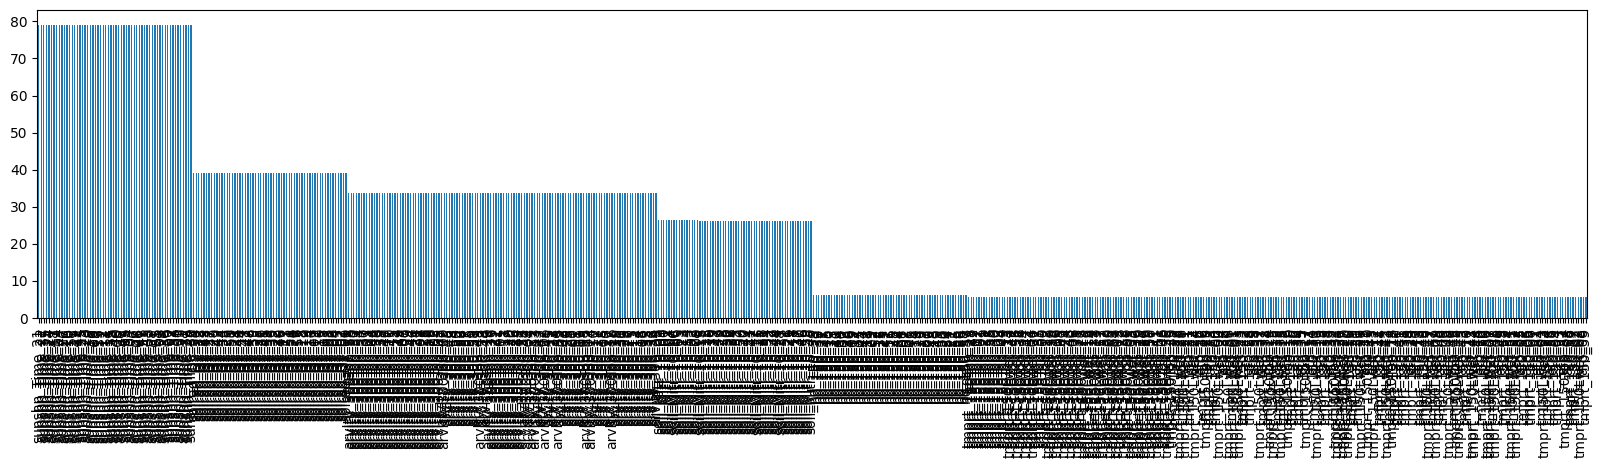

In [ ]:
summarize(X_weather)['Missing Values (%)'].sort_values(ascending=False).plot(kind='bar', figsize=(20,4))

In [ ]:
# Calculate missing value percentages for X_weather
missing_percentage_weather = X_weather.isnull().sum() / len(X_weather) * 100

# Identify columns with missing percentage >= 30% in X_weather
high_missing_cols = missing_percentage_weather[missing_percentage_weather >= 50]

display(high_missing_cols)

,0
sunshn_Time_59,79.147393
sunshn_Time_58,79.147690
sunshn_Time_57,79.147096
sunshn_Time_56,79.148283
sunshn_Time_55,79.147393
sunshn_Time_54,79.148283
sunshn_Time_53,79.147986
sunshn_Time_52,79.149469
sunshn_Time_51,79.147986
sunshn_Time_50,79.147393


In [ ]:
# Calculate missing value percentages for X_weather
missing_percentage_weather = X_weather.isnull().sum() / len(X_weather) * 100

# Identify columns with missing percentage >= 50% in X_weather
high_missing_cols = missing_percentage_weather[missing_percentage_weather >= 50]

print("Columns in X_weather with >= 50% missing values:")
display(high_missing_cols)

Columns in X_weather with >= 50% missing values:


,0
sunshn_Time_59,79.147393
sunshn_Time_58,79.147690
sunshn_Time_57,79.147096
sunshn_Time_56,79.148283
sunshn_Time_55,79.147393
sunshn_Time_54,79.148283
sunshn_Time_53,79.147986
sunshn_Time_52,79.149469
sunshn_Time_51,79.147986
sunshn_Time_50,79.147393


In [ ]:
# Identify columns containing 'sunshn_Time'
sunshn_cols_to_drop = [col for col in X_weather.columns if 'sunshn_Time' in col]

# Drop these columns from X_weather
X_weather = X_weather.drop(columns=sunshn_cols_to_drop)

print(f"Dropped {len(sunshn_cols_to_drop)} columns containing 'sunshn_Time'.")
print("New X_weather shape:", X_weather.shape)

Dropped 60 columns containing 'sunshn_Time'.
New X_weather shape: (337248, 540)


In [ ]:
summarize(X_weather)

,Data Type,Unique Values,Missing Values (%),Sample Values
tmprt_150_59,float64,491,5.735245,"[12.1, 12.7, 12.5, 13.9, 10.6, 15.6, 7.3, 9.0,..."
tmprt_150Top_59,float64,522,5.735542,"[18.2, 20.0, 20.8, 21.2, 21.1, 22.4, 16.2, 17...."
tmprt_150Lwet_59,float64,518,5.735542,"[6.2, 6.3, 5.6, 8.6, 2.7, 9.9, -0.3, 2.0, 9.4,..."
hd_150_59,float64,908,6.226872,"[76.2, 75.3, 80.8, 73.7, 77.4, 79.1, 73.5, 76...."
arvlty_300_59,float64,71,33.781075,"[0.4, 0.6, 0.2, 0.9, 1.6, 1.5, 0.7, 1.0, 1.2, ..."
...,...,...,...,...
arvlty_300_00,float64,69,33.777220,"[0.3, 0.5, 1.1, 0.4, 0.0, 2.5, 3.0, 2.0, 0.6, ..."
arvlty_300Top_00,float64,357,33.783744,"[4.7, 4.0, 6.1, 4.4, 0.0, 0.4, 8.9, 9.6, 5.2, ..."
afp_00,float64,356,5.735245,"[1.0, 0.0, 5.0, 0.5, 15.0, 4.0, 4.5, 3.5, 1.5,..."
solrad_Qy_00,float64,3331,39.070951,"[3.54, 8.05, 7.49, 9.74, 10.67, 9.56, 8.17, 7...."


In [ ]:
# Get the summary of X_weather
summary_weather = summarize(X_weather)

# Sort the summary DataFrame by index (column names)
summary_weather_sorted = summary_weather.sort_index()

# Display the sorted summary
display(summary_weather_sorted)

,Data Type,Unique Values,Missing Values (%),Sample Values
afp_00,float64,356,5.735245,"[1.0, 0.0, 5.0, 0.5, 15.0, 4.0, 4.5, 3.5, 1.5,..."
afp_01,float64,357,5.735245,"[0.5, 0.0, 3.5, 5.0, 2.5, 6.5, 1.0, 4.0, 1.5, ..."
afp_02,float64,369,5.735245,"[0.0, 0.5, 8.5, 2.5, 2.0, 1.0, 4.0, 1.5, 3.5, ..."
afp_03,float64,349,5.735245,"[0.0, 1.0, 2.5, 0.5, 1.5, 4.5, 2.0, 6.5, 1.3, ..."
afp_04,float64,354,5.735245,"[0.5, 0.0, 8.0, 3.5, 2.5, 1.5, 1.0, 6.5, 13.0,..."
...,...,...,...,...
tmprt_150_55,float64,492,5.735245,"[10.7, 11.2, 8.5, 10.0, 7.7, 10.2, 10.6, 12.3,..."
tmprt_150_56,float64,495,5.735245,"[9.2, 10.4, 8.1, 12.9, 10.7, 8.3, 10.1, 10.8, ..."
tmprt_150_57,float64,483,5.735245,"[8.1, 14.3, 11.6, 14.8, 11.4, 8.8, 9.9, 11.5, ..."
tmprt_150_58,float64,482,5.735245,"[8.1, 14.2, 12.8, 13.9, 10.9, 12.4, 8.3, 10.6,..."


## 시계열자료 채우기 시간순으로

In [ ]:
# 소팅을 해서 컬럼명이 텍스트가 같은 그룹내에서 날짜순으로 앞뒤로 채우려고
X_weather = X_weather.sort_index(axis=1)
X_weather.head()

,afp_00,afp_01,afp_02,afp_03,afp_04,afp_05,afp_06,afp_07,afp_08,afp_09,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,1.0,0.0,0.5,1.0,0.5,0.0,1.0,4.0,0.0,0.0,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5


In [ ]:
import re

def fix_nan_auto_group(df):

    '''
    시계열자료 채우기 로직
    '''
    result = df.copy()

    # 컬럼 이름에서 그룹 접두사(e.g., 'wtf', 'vsf')를 자동으로 추출
    # '_01' 과 같은 부분을 제외하고 고유한 그룹 이름을 찾음
    groups = {re.findall(r'(\w+)_', col)[0] for col in df.columns if '_' in col}

    # 각 그룹별로 NaN 값 채우기
    for group_name in groups:
        group_cols = [col for col in df.columns if col.startswith(group_name)]
        # 그룹 내에서 뒤쪽 값으로 먼저 채운 후 앞쪽 값으로 채우기
        result[group_cols] = result[group_cols].bfill(axis=1).ffill(axis=1)

    # 그룹 내에서 채워지지 않은 NaN(행의 양끝)을 0으로 채우기
    result = result.fillna(0)

    return result

In [ ]:
X_weather = fix_nan_auto_group(X_weather)

In [ ]:
# Save X_weather and X_lims to Google Drive as pickle files
X_weather.to_pickle("/content/drive/MyDrive/식약처(아플라톡신 관련 데이터)/250708_통합 LIMS 시험검사 결과(항목 기준)_아플라톡신/_학습용 데이터_/X_weather.pkl", compression='gzip')
X_lims.to_pickle("/content/drive/MyDrive/식약처(아플라톡신 관련 데이터)/250708_통합 LIMS 시험검사 결과(항목 기준)_아플라톡신/_학습용 데이터_/X_lims.pkl", compression='gzip')

print("X_weather and X_lims saved successfully to Google Drive.")

X_weather and X_lims saved successfully to Google Drive.


In [ ]:
y_df_filtered

In [ ]:
y_df_filtered.to_pickle("/content/drive/MyDrive/식약처(아플라톡신 관련 데이터)/250708_통합 LIMS 시험검사 결과(항목 기준)_아플라톡신/_학습용 데이터_/y_df_filtered.pkl", compression='gzip')

In [ ]:
summarize(X_weather)

,Data Type,Unique Values,Missing Values (%),Sample Values
afp_00,float64,356,0.0,"[1.0, 0.0, 5.0, 0.5, 15.0, 4.0, 4.5, 3.5, 1.5,..."
afp_01,float64,357,0.0,"[0.5, 0.0, 3.5, 5.0, 2.5, 6.5, 1.0, 4.0, 1.5, ..."
afp_02,float64,369,0.0,"[0.0, 0.5, 8.5, 2.5, 2.0, 1.0, 4.0, 1.5, 3.5, ..."
afp_03,float64,349,0.0,"[0.0, 1.0, 2.5, 0.5, 1.5, 4.5, 2.0, 6.5, 1.3, ..."
afp_04,float64,354,0.0,"[0.5, 0.0, 8.0, 3.5, 2.5, 1.5, 1.0, 6.5, 13.0,..."
...,...,...,...,...
tmprt_150_55,float64,492,0.0,"[10.7, 11.2, 8.5, 10.0, 7.7, 10.2, 10.6, 12.3,..."
tmprt_150_56,float64,495,0.0,"[9.2, 10.4, 8.1, 12.9, 10.7, 8.3, 10.1, 10.8, ..."
tmprt_150_57,float64,483,0.0,"[8.1, 14.3, 11.6, 14.8, 11.4, 8.8, 9.9, 11.5, ..."
tmprt_150_58,float64,482,0.0,"[8.1, 14.2, 12.8, 13.9, 10.9, 12.4, 8.3, 10.6,..."


## 입력데이터 정리

In [ ]:
import pandas as pd

X_lims = pd.read_pickle("/content/drive/MyDrive/X_lims.pkl", compression='gzip')
X_weather = pd.read_pickle("/content/drive/MyDrive/X_weather.pkl", compression='gzip')
y_df_filtered = pd.read_pickle("/content/drive/MyDrive/y_df_filtered.pkl", compression='gzip')

print("X_weather shape:", X_weather.shape)
print("X_lims shape:", X_lims.shape)
print("y_df_filtered shape:", y_df_filtered.shape)

X_weather shape: (337248, 540)
X_lims shape: (337248, 4)
y_df_filtered shape: (337248, 3)


In [ ]:
# X_weather와 X_lims의 인덱스를 초기화하여 0부터 시작하는 연속적인 인덱스로 통일합니다.
X_weather.reset_index(drop=True, inplace=True)
X_lims.reset_index(drop=True, inplace=True)

# 이제 두 데이터프레임의 인덱스가 동일하므로 결측치 없이 안전하게 합칠 수 있습니다.

# Merge X_weather and X_lims based on their index
X = pd.concat([X_weather, X_lims], axis=1)
print("Shape of the combined DataFrame (X_combined):", X.shape)

Shape of the combined DataFrame (X_combined): (337248, 544)


In [ ]:
y = y_df_filtered.copy()
print("Shape of target:", y.shape)

Shape of target: (337248, 3)


In [ ]:
y

,JDGMNT_WORD_NAME,결과,결과값
0,적합,불검출,0
1,적합,불검출,0
2,적합,불검출,0
3,적합,불검출,0
4,적합,불검출,0
...,...,...,...
443819,적합,불검출,0
443820,적합,불검출,0
443821,적합,불검출,0
443822,적합,불검출,0


In [ ]:
summarize(X)

,Data Type,Unique Values,Missing Values (%),Sample Values
afp_00,float64,356,0.0,"[1.0, 0.0, 5.0, 0.5, 15.0, 4.0, 4.5, 3.5, 1.5,..."
afp_01,float64,357,0.0,"[0.5, 0.0, 3.5, 5.0, 2.5, 6.5, 1.0, 4.0, 1.5, ..."
afp_02,float64,369,0.0,"[0.0, 0.5, 8.5, 2.5, 2.0, 1.0, 4.0, 1.5, 3.5, ..."
afp_03,float64,349,0.0,"[0.0, 1.0, 2.5, 0.5, 1.5, 4.5, 2.0, 6.5, 1.3, ..."
afp_04,float64,354,0.0,"[0.5, 0.0, 8.0, 3.5, 2.5, 1.5, 1.0, 6.5, 13.0,..."
...,...,...,...,...
tmprt_150_59,float64,491,0.0,"[12.1, 12.7, 12.5, 13.9, 10.6, 15.6, 7.3, 9.0,..."
INSPCT_PURPS_NAME,object,10,0.0,"[자가품질위탁검사, 기타, 수거검사, 품질검사, 수입검사, 제조.수입품목허가(신고)..."
PRDLST_NM,object,1177,0.0,"[과자, 보스웰리아추출물등 복합물(Flexir)(제2021-9호), 땅콩 또는 견과..."
사용주소,object,2,0.0,"[제조공장, 검사소]"


In [ ]:
# Merge X and y based on their index
# Using pd.concat with axis=1 assumes both dataframes have the same index
y.reset_index(drop=True, inplace=True)
merged_df = pd.concat([X, y], axis=1)
summarize(merged_df)

,Data Type,Unique Values,Missing Values (%),Sample Values
afp_00,float64,356,0.0,"[1.0, 0.0, 5.0, 0.5, 15.0, 4.0, 4.5, 3.5, 1.5,..."
afp_01,float64,357,0.0,"[0.5, 0.0, 3.5, 5.0, 2.5, 6.5, 1.0, 4.0, 1.5, ..."
afp_02,float64,369,0.0,"[0.0, 0.5, 8.5, 2.5, 2.0, 1.0, 4.0, 1.5, 3.5, ..."
afp_03,float64,349,0.0,"[0.0, 1.0, 2.5, 0.5, 1.5, 4.5, 2.0, 6.5, 1.3, ..."
afp_04,float64,354,0.0,"[0.5, 0.0, 8.0, 3.5, 2.5, 1.5, 1.0, 6.5, 13.0,..."
...,...,...,...,...
사용주소,object,2,0.0,"[제조공장, 검사소]"
1차 식품 분류 (세부),object,40,0.0,"[과자류, 빵류 또는 떡류, 건강기능식품(제품), 농산가공식품류, 장류, 특수영양식..."
JDGMNT_WORD_NAME,object,2,0.0,"[적합, 부적합]"
결과,object,2,0.0,"[불검출, 수치]"


In [ ]:
# Encode 'JDGMNT_WORD_NAME': 부적합=1, 적합=0
merged_df['JDGMNT_WORD_NAME_encoded'] = merged_df['JDGMNT_WORD_NAME'].map({'부적합': 1, '적합': 0})

print("Value counts for the new encoded 'JDGMNT_WORD_NAME_encoded' column:")
display(merged_df['JDGMNT_WORD_NAME_encoded'].value_counts())

print("\nFirst few rows of merged_df with the new encoded column:")
display(merged_df.head())

Value counts for the new encoded 'JDGMNT_WORD_NAME_encoded' column:


,count
JDGMNT_WORD_NAME_encoded,
0,333295
1,3953



First few rows of merged_df with the new encoded column:


,afp_00,afp_01,afp_02,afp_03,afp_04,afp_05,afp_06,afp_07,afp_08,afp_09,...,tmprt_150_58,tmprt_150_59,INSPCT_PURPS_NAME,PRDLST_NM,사용주소,1차 식품 분류 (세부),JDGMNT_WORD_NAME,결과,결과값,JDGMNT_WORD_NAME_encoded
0,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,8.1,12.1,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류",적합,불검출,0,0
1,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,8.1,12.1,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류",적합,불검출,0,0
2,1.0,0.0,0.5,1.0,0.5,0.0,1.0,4.0,0.0,0.0,...,14.2,12.7,자가품질위탁검사,과자,검사소,"과자류, 빵류 또는 떡류",적합,불검출,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,12.8,12.5,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품),적합,불검출,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,12.8,12.5,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품),적합,불검출,0,0


In [ ]:
# Display value counts for the encoded target variable
display(merged_df['JDGMNT_WORD_NAME_encoded'].value_counts())

,count
JDGMNT_WORD_NAME_encoded,
0,333295
1,3953


In [ ]:
# Save the merged_df to Google Drive as a pickle file
merged_df.to_pickle("/content/drive/MyDrive/merged_df.pkl", compression='gzip')

print("merged_df saved successfully to Google Drive.")

merged_df saved successfully to Google Drive.


In [ ]:
data= pd.read_pickle("/content/drive/MyDrive/merged_df.pkl", compression='gzip')
data

,afp_00,afp_01,afp_02,afp_03,afp_04,afp_05,afp_06,afp_07,afp_08,afp_09,...,tmprt_150_58,tmprt_150_59,INSPCT_PURPS_NAME,PRDLST_NM,사용주소,1차 식품 분류 (세부),JDGMNT_WORD_NAME,결과,결과값,JDGMNT_WORD_NAME_encoded
0,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,8.1,12.1,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류",적합,불검출,0,0
1,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,8.1,12.1,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류",적합,불검출,0,0
2,1.0,0.0,0.5,1.0,0.5,0.0,1.0,4.0,0.0,0.0,...,14.2,12.7,자가품질위탁검사,과자,검사소,"과자류, 빵류 또는 떡류",적합,불검출,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,12.8,12.5,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품),적합,불검출,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,12.8,12.5,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품),적합,불검출,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0
337244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0
337245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0
337246,0.0,0.0,0.0,0.0,0.0,27.5,0.0,0.0,0.0,0.0,...,14.9,15.7,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0


In [ ]:
display(data['1차 식품 분류 (세부)'].value_counts())

,count
1차 식품 분류 (세부),
농산가공식품류,138160
"과자류, 빵류 또는 떡류",87172
조미식품,20466
장류,10465
면류,9768
곡류,9475
견과 종실류,8509
음료류,8267
향신식물,7394


## 부적합의 비율을 늘리기 위한 데이터 다운사이징

In [ ]:
# Save the modified DataFrame to a pickle file
import pandas as pd
data= pd.read_pickle("/content/drive/MyDrive/merged_df.pkl", compression='gzip')
#data = data[['INSPCT_PURPS_NAME', 'PRDLST_NM', 'JDGMNT_WORD_NAME_encoded']].copy()  # 범주형변수인 LIMS 데이터만 추출
data = data[['INSPCT_PURPS_NAME',	'1차 식품 분류 (세부)',	'JDGMNT_WORD_NAME_encoded']].copy()  # 범주형변수인 LIMS 데이터만 추출
data.head()

,INSPCT_PURPS_NAME,1차 식품 분류 (세부),JDGMNT_WORD_NAME_encoded
0,자가품질위탁검사,"과자류, 빵류 또는 떡류",0
1,자가품질위탁검사,"과자류, 빵류 또는 떡류",0
2,자가품질위탁검사,"과자류, 빵류 또는 떡류",0
3,자가품질위탁검사,건강기능식품(제품),0
4,자가품질위탁검사,건강기능식품(제품),0


In [ ]:
data['1차 식품 분류 (세부)'].nunique()

40

### 작업 1. 검사종류와 식품종류의 경우에 부적합율을 생성
#### - 부적합률이 0 인 검사종류와 식품종류는 제거
#### - 즉 여기에 해당되는 식품은 아폴라톡신이 나온 경우가 과거에 없으니 예측도 무조건 없다고 한다.

In [ ]:
grouped_data = data.groupby(['INSPCT_PURPS_NAME',	'1차 식품 분류 (세부)'])['JDGMNT_WORD_NAME_encoded'].mean().reset_index()
grouped_data

,INSPCT_PURPS_NAME,1차 식품 분류 (세부),JDGMNT_WORD_NAME_encoded
0,검사명령검사,농산가공식품류,0.000000
1,기타,건강기능식품(제품),0.000000
2,기타,견과 종실류,0.000000
3,기타,곡류,0.000000
4,기타,"과자류, 빵류 또는 떡류",0.055825
...,...,...,...
144,품질검사,농산가공식품류,0.000000
145,품질검사,장류,0.000000
146,품질검사,조미식품,0.000000
147,품질검사,코코아가공품류 또는 초콜릿류,0.000000


In [ ]:
filtered_data = grouped_data[grouped_data['JDGMNT_WORD_NAME_encoded'] == 0]
display(filtered_data)

,INSPCT_PURPS_NAME,1차 식품 분류 (세부),JDGMNT_WORD_NAME_encoded
0,검사명령검사,농산가공식품류,0.0
1,기타,건강기능식품(제품),0.0
2,기타,견과 종실류,0.0
3,기타,곡류,0.0
7,기타,당류,0.0
...,...,...,...
144,품질검사,농산가공식품류,0.0
145,품질검사,장류,0.0
146,품질검사,조미식품,0.0
147,품질검사,코코아가공품류 또는 초콜릿류,0.0


In [ ]:
# Create a boolean mask for rows to keep
rows_to_keep = ~data.set_index(['INSPCT_PURPS_NAME', '1차 식품 분류 (세부)']).index.isin(filtered_data.set_index(['INSPCT_PURPS_NAME', '1차 식품 분류 (세부)']).index)

# Filter the original data DataFrame
data_filtered_removed = data[rows_to_keep].copy()

data_filtered_removed

,INSPCT_PURPS_NAME,1차 식품 분류 (세부),JDGMNT_WORD_NAME_encoded
0,자가품질위탁검사,"과자류, 빵류 또는 떡류",0
1,자가품질위탁검사,"과자류, 빵류 또는 떡류",0
2,자가품질위탁검사,"과자류, 빵류 또는 떡류",0
3,자가품질위탁검사,건강기능식품(제품),0
4,자가품질위탁검사,건강기능식품(제품),0
...,...,...,...
337243,압·몰수품검사,기타식품류,0
337244,압·몰수품검사,기타식품류,0
337245,압·몰수품검사,기타식품류,0
337246,압·몰수품검사,기타식품류,0


In [ ]:
data_filtered_removed['JDGMNT_WORD_NAME_encoded'].value_counts(normalize=True)

,proportion
JDGMNT_WORD_NAME_encoded,
0,0.987875
1,0.012125


In [ ]:
# Save the data_filtered_removed DataFrame to Google Drive as a pickle file
data_filtered_removed.to_pickle("/content/drive/MyDrive/data_filtered_removed.pkl", compression='gzip')

print("data_filtered_removed DataFrame saved successfully to Google Drive.")

data_filtered_removed DataFrame saved successfully to Google Drive.


## 작업 2. 검사종류와 식품종류의 값을 컬럼으로 변경
#### - 컬럼에 해당되면 True, 아니면 False

In [ ]:
data_encoded = pd.get_dummies(data_filtered_removed, columns=['INSPCT_PURPS_NAME', '1차 식품 분류 (세부)'], prefix=['INSPCT', 'PRDLST'])
display(data_encoded.head())

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,PRDLST_음료류,PRDLST_장류,PRDLST_잼류,PRDLST_절임류 또는 조림류,PRDLST_조미식품,PRDLST_즉석식품류,PRDLST_채소류,PRDLST_코코아가공품류 또는 초콜릿류,PRDLST_특수영양식품,PRDLST_향신식물
0,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data = data_encoded.copy()

In [ ]:
data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,PRDLST_음료류,PRDLST_장류,PRDLST_잼류,PRDLST_절임류 또는 조림류,PRDLST_조미식품,PRDLST_즉석식품류,PRDLST_채소류,PRDLST_코코아가공품류 또는 초콜릿류,PRDLST_특수영양식품,PRDLST_향신식물
0,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337244,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337245,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337246,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Save the data DataFrame to Google Drive as a pickle file
data.to_pickle("/content/drive/MyDrive/data.pkl", compression='gzip')

print("data DataFrame saved successfully to Google Drive.")

data DataFrame saved successfully to Google Drive.


In [ ]:
data= pd.read_pickle("/content/drive/MyDrive/data.pkl", compression='gzip')
data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,PRDLST_음료류,PRDLST_장류,PRDLST_잼류,PRDLST_절임류 또는 조림류,PRDLST_조미식품,PRDLST_즉석식품류,PRDLST_채소류,PRDLST_코코아가공품류 또는 초콜릿류,PRDLST_특수영양식품,PRDLST_향신식물
0,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337244,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337245,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337246,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
merged_df= pd.read_pickle("/content/drive/MyDrive/merged_df.pkl", compression='gzip')

In [ ]:
display(merged_df['JDGMNT_WORD_NAME'].value_counts())

,count
JDGMNT_WORD_NAME,
적합,333295
부적합,3953


In [ ]:
merged_df

,afp_00,afp_01,afp_02,afp_03,afp_04,afp_05,afp_06,afp_07,afp_08,afp_09,...,tmprt_150_58,tmprt_150_59,INSPCT_PURPS_NAME,PRDLST_NM,사용주소,1차 식품 분류 (세부),JDGMNT_WORD_NAME,결과,결과값,JDGMNT_WORD_NAME_encoded
0,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,8.1,12.1,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류",적합,불검출,0,0
1,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,3.5,...,8.1,12.1,자가품질위탁검사,과자,제조공장,"과자류, 빵류 또는 떡류",적합,불검출,0,0
2,1.0,0.0,0.5,1.0,0.5,0.0,1.0,4.0,0.0,0.0,...,14.2,12.7,자가품질위탁검사,과자,검사소,"과자류, 빵류 또는 떡류",적합,불검출,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,12.8,12.5,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품),적합,불검출,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,12.8,12.5,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,건강기능식품(제품),적합,불검출,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0
337244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0
337245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0
337246,0.0,0.0,0.0,0.0,0.0,27.5,0.0,0.0,0.0,0.0,...,14.9,15.7,압·몰수품검사,압몰수 임의 품목,검사소,기타식품류,적합,불검출,0,0


In [ ]:
# Select columns from merged_df up to 'tmprt_150_59'
merged_df_subset = merged_df.loc[:, : 'tmprt_150_59']

# Merge data and merged_df_subset based on index
merged_data = pd.merge(data, merged_df_subset, left_index=True, right_index=True, how='left')

merged_data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,0,False,False,False,False,True,False,False,False,False,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337244,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337245,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337246,0,False,False,False,True,False,False,False,False,False,...,14.4,16.9,15.2,18.3,18.1,15.9,16.4,15.0,14.9,15.7


In [ ]:
merged_data.to_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')

In [ ]:
merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')
merged_data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,0,False,False,False,False,True,False,False,False,False,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337244,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337245,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337246,0,False,False,False,True,False,False,False,False,False,...,14.4,16.9,15.2,18.3,18.1,15.9,16.4,15.0,14.9,15.7


In [ ]:
print("Value Counts for 'JDGMNT_WORD_NAME_encoded' in merged_data:")
display(merged_data['JDGMNT_WORD_NAME_encoded'].value_counts())

print("\nProportions for 'JDGMNT_WORD_NAME_encoded' in merged_data:")
display(merged_data['JDGMNT_WORD_NAME_encoded'].value_counts(normalize=True) * 100)

Value Counts for 'JDGMNT_WORD_NAME_encoded' in merged_data:


,count
JDGMNT_WORD_NAME_encoded,
0,322068
1,3953



Proportions for 'JDGMNT_WORD_NAME_encoded' in merged_data:


,proportion
JDGMNT_WORD_NAME_encoded,
0,98.787501
1,1.212499
